In [1]:
#todos os seus imports aqui
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---

# Notas preliminares

Esta é uma avaliação formal. Conta para 15% da sua nota final. Por favor, observe as seguintes regras durante toda a avaliação:

1. Não pode falar com outros estudantes a partir do momento em que a avaliação
começa.
2. Haverá 15 minutos no início para colocar perguntas, 5 minutos a meio e outros 5 minutos perto do final do teste. Aguarde que o seu professor indique quando pode colocar perguntas.
3. Apenas pode consultar o site da documentação de Python.
4. Não pode consultar quaisquer cadernos anteriores que tenha criado ou que lhe tenham sido partilhados.
5. Todas as fórmulas matemáticas necessárias estão incluídas aqui.
6. Só pode ter o Jupyter Python e uma janela de navegador aberta na documentação de Python. Qualquer outra janela ou aplicação aberta pode invalidar o seu teste.
7. É proibida a distribuição dos conteúdos deste teste.
Não pode utilizar qualquer assistente de inteligência artificial.

---

# Quiz 1

1 - Vamos utilizar o dataset `Auto` para compreender o consumo de combustível dos carros. Como primeira atividade, faça o load do dataset fornecido pelo instrutor.

In [3]:
#open dataset in pandas
import pandas as pd
df = pd.read_csv('Auto (4).csv') #Atenção tive de mudar para (4) porque foi a quarta vez que dei download ao ficheio
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


2 - Se precisar de mais informações sobre o dataset, consulte o [link](https://islp.readthedocs.io/en/latest/datasets/Auto.html). Utilizando o conjunto de dados, tente responder à pergunta sobre quais são as idades máxima e mínima dos carros no dataframe e qual o consumo (mpg) máximo e mínimo dos carros. Use um histograma `.hist()` para tirar as suas conclusões.

min age: 42 | max age: 54 | min mpg: 9.0 | max mpg: 46.6


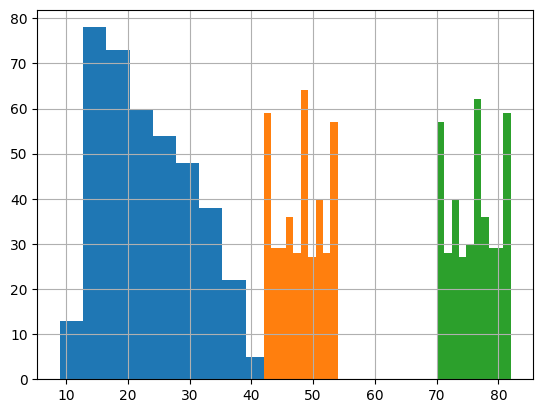

In [4]:
df['car_age'] = 2024 - (1900 + df['year'])
#criei uma coluna nova com a idade do carro
min_age = np.min(df['car_age'])
max_age = np.max(df['car_age'])

min_mpg = np.min(df['mpg'])
max_mpg = np.max(df['mpg'])

df['mpg'].hist(bins=10)
df['car_age'].hist(bins=10)
df['year'].hist(bins=10)


print(f'min age: {min_age} | max age: {max_age} | min mpg: {min_mpg} | max mpg: {max_mpg}')
#O print responde á pergunta neste caso a idade minima é o vaiculo mais recente, ou seja mais novo, e vice versa

3 - Na questão 2, analisámos tanto o histograma como as informações descritivas das duas colunas, `year` e `mpg`. Agora, utilize o intervalo de dados observado e crie uma nova variável binária que classifique os carros como **mais antigos** ou **mais recentes**. Explique o critério escolhido.

In [6]:
median_age = df['car_age'].median()
df['age_classification'] = pd.cut(df['car_age'], bins=[0, median_age, np.max(df['car_age'])], labels=['recentes', 'antigos'])
df[['name', 'year', 'car_age', 'age_classification']]

#escolhi a mediana como critério de divisão em dois conjuntos da idade
#dos carros de mais recentes para mais antigos, pois pareceme ser um valor
#indicado para a repartição em dois conjuntos visto que é o valor central das idades do carro

,name,year,car_age,age_classification
0,chevrolet chevelle malibu,70,54,antigos
1,buick skylark 320,70,54,antigos
2,plymouth satellite,70,54,antigos
3,amc rebel sst,70,54,antigos
4,ford torino,70,54,antigos
...,...,...,...,...
392,ford mustang gl,82,42,recentes
393,vw pickup,82,42,recentes
394,dodge rampage,82,42,recentes
395,ford ranger,82,42,recentes


4 - Portanto, agora tem uma variável que classifica cada datapoint do dataframe que indica se um carro é **novo** ou **velho**. Com isso, crie um boxplot e afim de analisar o consumo de combustível de carros mais antigos e mais novos.

<Axes: title={'center': 'mpg'}, xlabel='[age_classification]'>

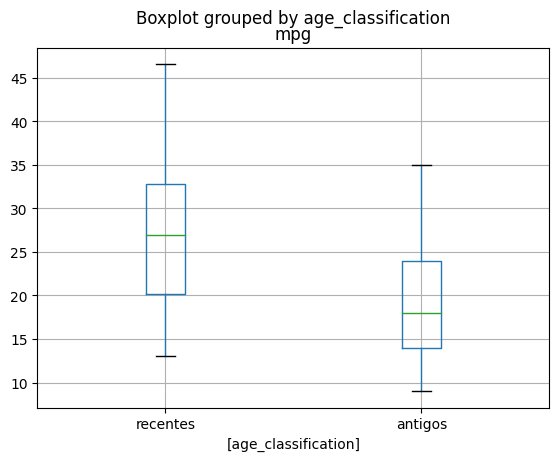

In [7]:
df[['age_classification','mpg']].boxplot(by='age_classification')

5 - Que conclusões podes retirar do boxplot acima? Interprete e explique o plot que acabaste de gerar.

In [8]:
#Os veículos mais recentes tendem a ser mais eficientes em termos de consumo de
#combustível, com valores de mpg geralmente mais altos do que os veículos antigos.
#Ou seja, com a mediana em torno de 25-30 e a variação é relativamente grande,
#concluimos que este conseguem fazer mais pilhas por galão, em caso contrário
#os carros antigos são mais consumistas, pois estes têm uma variancia relativamente mais baixa.


6 - O ano de fabrico do carro pode influenciar o seu consumo. Para além do ano de fabrico, é possível relacionar a cilindrada do motor com o consumo de combustível? Utilize um gráfico de dispersão `df.plot.scatter()` para fundamentar a sua resposta e justifique-a.

array([[<Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='mpg', ylabel='cylinders'>],
       [<Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='mpg', ylabel='mpg'>]], dtype=object)

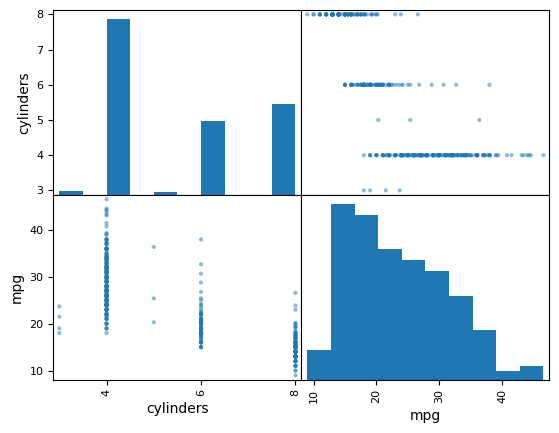

In [12]:
pd.plotting.scatter_matrix(df[['cylinders','mpg']])
#Concluo que há uma relação negativa perfeita entre mpg e cilindragem dos carros
#quanto maior fora a celindrada dos carros, menor vai ser o numero de milhas que é feito por galão
#portanto é um bom dado estatisitco para ter em conta relativamente ao numero de celindrada de um carro
#quando queremos comprar um carro mais eficiente.

7 - Para complementar a análise acima, crie dois diagramas de dispersão separados que relacionem o consumo (mpg) e a potência (horsepower). Um dos diagramas deve conter apenas carros com 4 cilindros e o outro apenas carros com 8 cilindros.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               392 non-null    int64   
 1   mpg                 392 non-null    float64 
 2   cylinders           392 non-null    int64   
 3   displacement        392 non-null    float64 
 4   horsepower          392 non-null    int64   
 5   weight              392 non-null    int64   
 6   acceleration        392 non-null    float64 
 7   year                392 non-null    int64   
 8   origin              392 non-null    int64   
 9   name                392 non-null    object  
 10  car_age             392 non-null    int64   
 11  age_classification  392 non-null    category
dtypes: category(1), float64(3), int64(7), object(1)
memory usage: 34.3+ KB


32 ?
126 ?
330 ?
336 ?
354 ?


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>]], dtype=object)

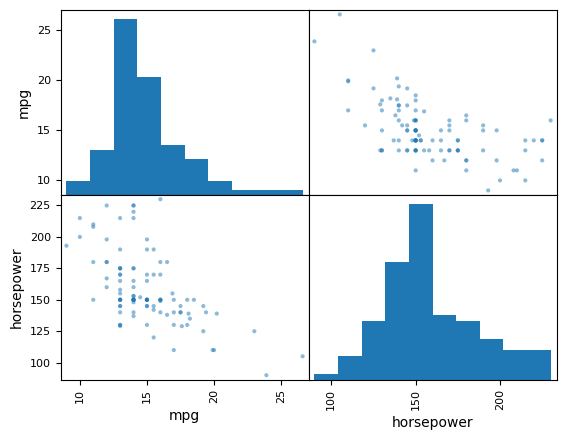

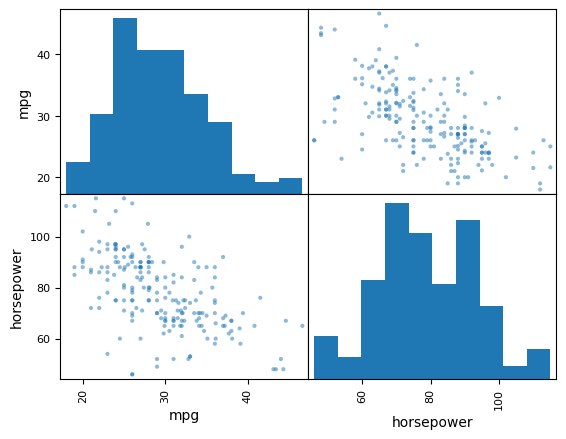

In [11]:

#identificar todos os casos do horsepower que não estão corretoss
for id,x in enumerate(df['horsepower']):
  if not x.isnumeric():
    print(id,x)
#decidi dar drop desses casos pois são dados incorretos colocando os ids do for
df = df.drop([32,126,330,336,354]).reset_index()
#aqui estou a mudar o tipo do horsepower para inteiro visto que estava em object vi isso com df.info()
df['horsepower'] = df['horsepower'].astype(int)

cilindragem_8 = df.loc[df['cylinders'] == 8]
cilindragem_4 = df.loc[df['cylinders'] == 4]

pd.plotting.scatter_matrix(cilindragem_8[['mpg','horsepower']])
pd.plotting.scatter_matrix(cilindragem_4[['mpg','horsepower']])

8 - Que conclusões podes tirar dos resultados apresentados acima?

In [ ]:
#Conseguimos concluir melhor ainda que a quantidade de cilindros relativamente à horsepower
#influencia no consumo de um carro pois, horsepower com 8 cilindros continua com uma relação negativa forte
#com o mpg por outro lado com 4 cilindros é uma relação negativa na mesma mas mais dispersa, ou seja, os casos
# não são tanto conclusivos


9 - Por fim, qual fabricante tem carros com menor consumo de combustível? Utilize um boxplot para justificar a sua resposta.

<Axes: title={'center': 'mpg'}, xlabel='[origin]'>

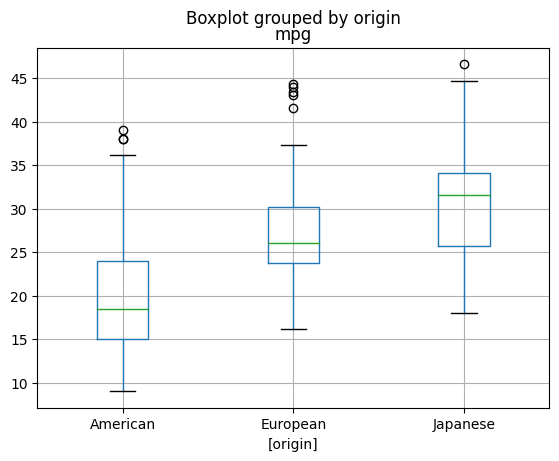

In [15]:
df[['origin','mpg']].replace({'origin': {1: 'American', 2: 'European', 3: 'Japanese'}}).boxplot(by='origin')

#Ao visulaizar a documentação dos dados Auto, conclui que a a origem é relativa aos três paises que utilizo no metodo
#Replace. Os japoneses são os produtores de carros mais eficientes visto que a mediana de mpg é mais alta, logo
#são os que tem o menor consumo de combustivel, por outro lado a America tem o maior consumo de combustivel visto que tem
#a menor mediana de mpg. Os carros europeus estão no intermedio dos outros dois no entanto, pela variedade de outliers
#conseguimos perceber que existem bastantes casos expecionais.